In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time

In [2]:
aggregated_data = pd.read_csv("column_names_fixed.csv")
aggregated_data.head()

,Unnamed: 0,Player,Season,AS,Age,Pos,Tm,G,GS,MP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,A.J. Green,2023,0,23,SG,29,29,0,9.8,...,1.000,0.2,1.0,1.1,0.7,0.2,0.0,0.3,1.0,4.8
1,1,A.J. Hammons,2017,0,24,C,22,22,0,7.4,...,0.450,0.4,1.3,1.6,0.2,0.0,0.6,0.5,1.0,2.2
2,3,A.J. Price,2010,0,23,PG,56,56,2,15.4,...,0.800,0.2,1.4,1.6,1.9,0.6,0.1,1.1,0.9,7.3
3,4,A.J. Price,2011,0,24,PG,50,50,0,15.9,...,0.667,0.3,1.1,1.4,2.2,0.6,0.0,1.1,1.2,6.5
4,5,A.J. Price,2012,0,25,PG,44,44,1,12.9,...,0.800,0.3,1.1,1.4,2.0,0.5,0.0,0.7,0.7,3.9


In [3]:
data = aggregated_data.drop(columns=['Unnamed: 0'])
data.head()

,Player,Season,AS,Age,Pos,Tm,G,GS,MP,FG,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,A.J. Green,2023,0,23,SG,29,29,0,9.8,1.7,...,1.000,0.2,1.0,1.1,0.7,0.2,0.0,0.3,1.0,4.8
1,A.J. Hammons,2017,0,24,C,22,22,0,7.4,0.8,...,0.450,0.4,1.3,1.6,0.2,0.0,0.6,0.5,1.0,2.2
2,A.J. Price,2010,0,23,PG,56,56,2,15.4,2.6,...,0.800,0.2,1.4,1.6,1.9,0.6,0.1,1.1,0.9,7.3
3,A.J. Price,2011,0,24,PG,50,50,0,15.9,2.3,...,0.667,0.3,1.1,1.4,2.2,0.6,0.0,1.1,1.2,6.5
4,A.J. Price,2012,0,25,PG,44,44,1,12.9,1.3,...,0.800,0.3,1.1,1.4,2.0,0.5,0.0,0.7,0.7,3.9


In [4]:
data.columns

Index(['Player', 'Season', 'AS', 'Age', 'Pos', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FGP', '3P', '3PA', '3PP', '2P', '2PA', '2PP', 'eFGP', 'FT',
       'FTA', 'FTP', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS'],
      dtype='object')

In [5]:
data = data.rename(columns={"3P": "three_P", "3PA": "three_PA", "3PP": "three_PP", "2P": "two_P", "2PA": "two_PA", "2PP": "two_PP"})
data.columns

Index(['Player', 'Season', 'AS', 'Age', 'Pos', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FGP', 'three_P', 'three_PA', 'three_PP', 'two_P', 'two_PA',
       'two_PP', 'eFGP', 'FT', 'FTA', 'FTP', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [6]:
data.groupby(by="Season").sum()["AS"]

Season
2009    17
2010    20
2011    17
2012    21
2013    20
2014    23
2015    25
2016    24
2017    25
2018    26
2019    25
2020    22
2021    24
2022    25
2023    23
Name: AS, dtype: int64

In [7]:
train_data = data[data["Season"] <= 2019]
train_data

,Player,Season,AS,Age,Pos,Tm,G,GS,MP,FG,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,A.J. Hammons,2017,0,24,C,22,22,0,7.4,0.8,...,0.450,0.4,1.3,1.6,0.2,0.0,0.6,0.5,1.0,2.2
2,A.J. Price,2010,0,23,PG,56,56,2,15.4,2.6,...,0.800,0.2,1.4,1.6,1.9,0.6,0.1,1.1,0.9,7.3
3,A.J. Price,2011,0,24,PG,50,50,0,15.9,2.3,...,0.667,0.3,1.1,1.4,2.2,0.6,0.0,1.1,1.2,6.5
4,A.J. Price,2012,0,25,PG,44,44,1,12.9,1.3,...,0.800,0.3,1.1,1.4,2.0,0.5,0.0,0.7,0.7,3.9
5,A.J. Price,2013,0,26,PG,57,57,22,22.4,2.8,...,0.790,0.4,1.6,2.0,3.6,0.6,0.1,1.1,1.3,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6294,Zydrunas Ilgauskas,2011,0,35,C,72,72,51,15.9,2.3,...,0.783,1.5,2.5,4.0,0.4,0.3,0.8,0.7,2.6,5.0
6295,Álex Abrines,2017,0,23,SG,68,68,6,15.5,2.0,...,0.898,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0
6296,Álex Abrines,2018,0,24,SG,75,75,8,15.1,1.5,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
6297,Álex Abrines,2019,0,25,SG,31,31,2,19.0,1.8,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3


In [8]:
test_data = data[data["Season"] > 2019]
test_data

,Player,Season,AS,Age,Pos,Tm,G,GS,MP,FG,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,A.J. Green,2023,0,23,SG,29,29,0,9.8,1.7,...,1.000,0.200,1.000,1.100,0.7,0.200,0.0,0.300,1.0,4.8
7,AJ Griffin,2023,0,19,SF,58,58,11,20.2,3.6,...,0.875,0.400,1.600,2.100,1.0,0.700,0.1,0.600,1.3,9.1
21,Aaron Gordon,2020,0,24,PF,62,62,62,32.5,5.4,...,0.674,1.700,5.900,7.700,3.7,0.800,0.6,1.600,2.0,14.4
22,Aaron Gordon,2021,0,25,PF,25,100,100,83.0,4.6,...,0.659,1.525,4.125,5.675,3.2,0.675,0.7,1.925,1.8,12.4
23,Aaron Gordon,2022,0,26,PF,75,75,75,31.7,5.8,...,0.743,1.700,4.200,5.900,2.5,0.600,0.6,1.800,2.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6286,Ziaire Williams,2022,0,20,SF,62,62,31,21.7,3.1,...,0.782,0.400,1.700,2.100,1.0,0.600,0.2,0.700,1.8,8.1
6287,Ziaire Williams,2023,0,21,SF,31,31,3,16.0,2.2,...,0.765,0.400,1.900,2.300,0.8,0.400,0.2,1.000,1.7,5.4
6288,Zion Williamson,2020,0,19,PF,24,24,24,27.8,8.8,...,0.640,2.700,3.600,6.300,2.1,0.700,0.4,2.500,1.8,22.5
6289,Zion Williamson,2021,1,20,PF,61,61,61,33.2,10.4,...,0.698,2.700,4.500,7.200,3.7,0.900,0.6,2.700,2.2,27.0


Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated. Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated.

In [9]:
predictors = train_data.drop(["Player", "Season", "AS"], axis=1)
predictors.head()

,Age,Pos,Tm,G,GS,MP,FG,FGA,FGP,three_P,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,24,C,22,22,0,7.4,0.8,1.9,0.405,0.2,...,0.450,0.4,1.3,1.6,0.2,0.0,0.6,0.5,1.0,2.2
2,23,PG,56,56,2,15.4,2.6,6.3,0.410,1.1,...,0.800,0.2,1.4,1.6,1.9,0.6,0.1,1.1,0.9,7.3
3,24,PG,50,50,0,15.9,2.3,6.4,0.356,0.8,...,0.667,0.3,1.1,1.4,2.2,0.6,0.0,1.1,1.2,6.5
4,25,PG,44,44,1,12.9,1.3,4.0,0.339,0.6,...,0.800,0.3,1.1,1.4,2.0,0.5,0.0,0.7,0.7,3.9
5,26,PG,57,57,22,22.4,2.8,7.2,0.390,1.2,...,0.790,0.4,1.6,2.0,3.6,0.6,0.1,1.1,1.3,7.7


In [10]:
predictors.corr()

,Age,Tm,G,GS,MP,FG,FGA,FGP,three_P,three_PA,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Age,1.000000,0.028085,0.063550,0.050304,0.097724,0.005892,0.009567,-0.004919,0.103391,0.092235,...,0.112147,-0.066246,0.040967,0.008300,0.083035,0.004668,-0.037974,-0.008232,-0.000023,0.012874
Tm,0.028085,1.000000,0.791239,0.552591,0.353397,0.491462,0.460961,0.382652,0.287185,0.259093,...,0.211172,0.307657,0.440633,0.421254,0.298840,0.400401,0.277448,0.380574,0.495057,0.478562
G,0.063550,0.791239,1.000000,0.540324,0.739207,0.355642,0.344933,0.249012,0.248204,0.231640,...,0.188321,0.190015,0.300945,0.281340,0.228021,0.296023,0.159059,0.282675,0.359084,0.349800
GS,0.050304,0.552591,0.540324,1.000000,0.638079,0.703562,0.687763,0.278535,0.349242,0.340132,...,0.166237,0.391950,0.613751,0.575275,0.479711,0.571420,0.369207,0.605596,0.551541,0.690088
MP,0.097724,0.353397,0.739207,0.638079,1.000000,0.494859,0.517457,0.117147,0.341764,0.350631,...,0.187486,0.181518,0.365168,0.325724,0.371745,0.424888,0.150098,0.450519,0.380136,0.499266
FG,0.005892,0.491462,0.355642,0.703562,0.494859,1.000000,0.978713,0.378928,0.467289,0.465977,...,0.269877,0.424572,0.703040,0.650878,0.594313,0.639481,0.392910,0.809527,0.593138,0.987117
FGA,0.009567,0.460961,0.344933,0.687763,0.517457,0.978713,1.000000,0.224682,0.555651,0.571115,...,0.310470,0.322453,0.636001,0.568720,0.633034,0.659013,0.299604,0.823195,0.559455,0.981467
FGP,-0.004919,0.382652,0.249012,0.278535,0.117147,0.378928,0.224682,1.000000,-0.120650,-0.190321,...,-0.053052,0.529704,0.457519,0.506401,0.053561,0.163552,0.471018,0.212160,0.412484,0.321603
three_P,0.103391,0.287185,0.248204,0.349242,0.341764,0.467289,0.555651,-0.120650,1.000000,0.982100,...,0.383276,-0.259998,0.115554,-0.001168,0.402024,0.400908,-0.153931,0.362020,0.176104,0.544240
three_PA,0.092235,0.259093,0.231640,0.340132,0.350631,0.465977,0.571115,-0.190321,0.982100,1.000000,...,0.375308,-0.274904,0.110038,-0.009949,0.423924,0.419830,-0.168086,0.384720,0.170913,0.544781


In [11]:
corr_matrix = train_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

to_drop


/var/folders/ks/j_y0rbj51tg_wd37qg9mpb5c0000gn/T/ipykernel_58654/2058914866.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['G',
 'MP',
 'FG',
 'FGA',
 'three_PA',
 'two_P',
 'two_PA',
 'two_PP',
 'eFGP',
 'FT',
 'FTA',
 'DRB',
 'TRB',
 'BLK',
 'TOV',
 'PTS']

In [12]:
corr_matrix = train_data.corr().abs()
high_corr_var=np.where(corr_matrix>0.7)
high_corr_var=[(corr_matrix.index[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('Tm', 'G'),
 ('G', 'MP'),
 ('GS', 'FG'),
 ('FG', 'FGA'),
 ('FG', 'two_P'),
 ('FG', 'two_PA'),
 ('FG', 'FT'),
 ('FG', 'FTA'),
 ('FG', 'DRB'),
 ('FG', 'TOV'),
 ('FG', 'PTS'),
 ('FGA', 'two_P'),
 ('FGA', 'two_PA'),
 ('FGA', 'FT'),
 ('FGA', 'FTA'),
 ('FGA', 'TOV'),
 ('FGA', 'PTS'),
 ('FGP', 'two_PP'),
 ('FGP', 'eFGP'),
 ('three_P', 'three_PA'),
 ('two_P', 'two_PA'),
 ('two_P', 'FT'),
 ('two_P', 'FTA'),
 ('two_P', 'DRB'),
 ('two_P', 'TRB'),
 ('two_P', 'TOV'),
 ('two_P', 'PTS'),
 ('two_PA', 'FT'),
 ('two_PA', 'FTA'),
 ('two_PA', 'DRB'),
 ('two_PA', 'TOV'),
 ('two_PA', 'PTS'),
 ('two_PP', 'eFGP'),
 ('FT', 'FTA'),
 ('FT', 'TOV'),
 ('FT', 'PTS'),
 ('FTA', 'TOV'),
 ('FTA', 'PTS'),
 ('ORB', 'DRB'),
 ('ORB', 'TRB'),
 ('DRB', 'TRB'),
 ('TRB', 'BLK'),
 ('AST', 'TOV'),
 ('TOV', 'PTS')]

In [13]:
predictors.columns

Index(['Age', 'Pos', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FGP', 'three_P',
       'three_PA', 'three_PP', 'two_P', 'two_PA', 'two_PP', 'eFGP', 'FT',
       'FTA', 'FTP', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS'],
      dtype='object')

In [14]:
logit_model_including_all = sm.logit(formula = 'AS~'+'+'.join(predictors.columns), data = train_data).fit() #Developing logistic regression model
logit_model_including_all.summary()

Optimization terminated successfully.
         Current function value: 0.069905
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     AS   No. Observations:                 4394
Model:                          Logit   Df Residuals:                     4362
Method:                           MLE   Df Model:                           31
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.6731
Time:                        22:04:42   Log-Likelihood:                -307.16
converged:                       True   LL-Null:                       -939.62
Covariance Type:            nonrobust   LLR p-value:                2.670e-246
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.6687      5.818     -2.006      0.045     -23.071      -0.266
Pos[T.PF]      0.6645      0.401      1.657      0.098      -0.121       1.450
Pos[T.PG]      0.0994      0.764      0.130      0.896      -1.397       1.596
Pos[T.SF]      0.3088      0.592      0.521      0.602      -0.852       1.470
Pos[T.SG]      0.0871      0.680      0.128      0.898      -1.246       1.421
Age            0.0490      0.031      1.563      0.118      -0.012       0.110
Tm             0.0550      0.039      1.419      0.156      -0.021       0.131
G             -0.0685      0.041     -1.688      0.091      -0.148       0.011
GS             0.0399      0.021      1.947      0.051      -0.000       0.080
MP             0.0169      0.038      0.445      0.657      -0.058       0.091
FG             5.1308      3.373      1.521      0.128      -1.480      11.741
FGA           -1.3052      2.226     -0.586      0.558      -5.668       3.058
FGP            8.3139     19.027      0.437      0.662     -28.979      45.607
three_P        5.3384      3.054      1.748      0.081      -0.648      11.325
three_PA       0.1429      2.244      0.064      0.949      -4.255       4.541
three_PP       0.4370      1.102      0.397      0.692      -1.723       2.597
two_P          0.5070      2.426      0.209      0.834      -4.248       5.262
two_PA         0.8216      2.230      0.368      0.713      -3.549       5.192
two_PP        -5.1095     12.686     -0.403      0.687     -29.974      19.755
eFGP         -13.1711     18.204     -0.724      0.469     -48.850      22.508
FT             1.6796      1.552      1.082      0.279      -1.362       4.721
FTA            0.7232      0.486      1.489      0.136      -0.229       1.675
FTP            2.7747      3.503      0.792      0.428      -4.091       9.641
ORB            1.6612      2.117      0.785      0.433      -2.488       5.810
DRB            1.5950      2.106      0.757      0.449      -2.534       5.723
TRB           -1.3258      2.107     -0.629      0.529      -5.455       2.803
AST            0.5980      0.106      5.645      0.000       0.390       0.806
STL            0.5444      0.315      1.726      0.084      -0.074       1.162
BLK            1.0123      0.290      3.496      0.000       0.445       1.580
TOV           -0.6218      0.264     -2.355      0.019      -1.139      -0.104
PF            -0.7430      0.256     -2.904      0.004      -1.245      -0.241
PTS           -2.0140      1.481     -1.360      0.174      -4.916       0.888
==============================================================================

Possibly complete quasi-separation: A fraction 0.53 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Classification accuracy

In [15]:
#Function to compute confusion matrix and prediction accuracy on training data

def confusion_matrix_train(model,cutoff=0.3):
    # Confusion matrix
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    #Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))

Train

Classification accuracy = 96.7%


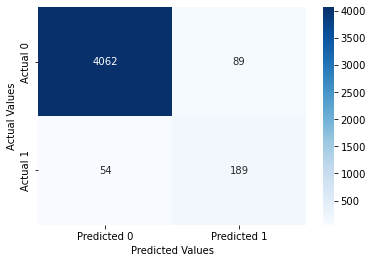

In [16]:
cm_train = confusion_matrix_train(logit_model_including_all)

The prediction accuracy was found to be 96.7% for train data.

In [17]:
#Function to compute confusion matrix and prediction accuracy on test data

def confusion_matrix_test(data,actual_values,model,cutoff=0.3):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))

Test

Classification accuracy = 95.0%


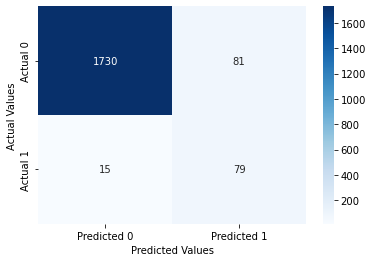

In [18]:
confusion_matrix_test(test_data,test_data.AS,logit_model_including_all)

The prediction accuracy was found to be 95.0% for test data.

Recall

What is the minimum Recall of the model among the Recall performance on train data and test data? Consider a decision threshold probability of 30% when classifying observations.

Here, Recall is the proportion of players predicted to take part in the all star team among those who actually turn out to become all stars.

Recall: Mathematically, we define recall as the number of true positives divided by the number of true positives plus the number of false negatives.

0.9835153014841979


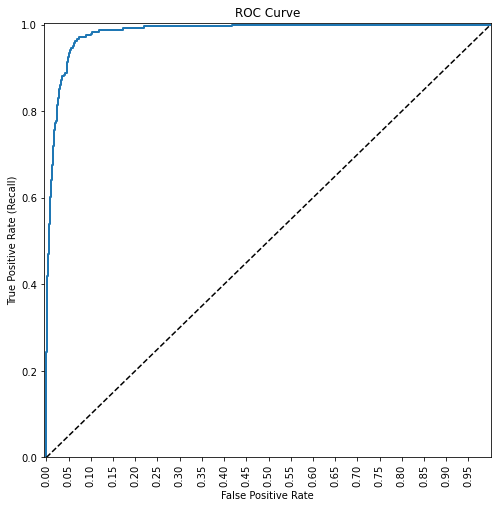

In [19]:
from sklearn.metrics import roc_curve, auc

y = train_data.AS
ypred = logit_model_including_all.predict(train_data)
fpr, tpr, auc_thresholds = roc_curve(y, ypred)

print(auc(fpr, tpr))# AUC of ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    #plt.plot(fpr[np.argmax(net_profit_array_notperperson)+1],tpr[np.argmax(net_profit_array_notperperson)+1], marker="o")
    plt.plot([0, 1], [0, 1], 'k--')   
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr, tpr, auc_thresholds = roc_curve(y, ypred)


plot_roc_curve(fpr, tpr)



In [20]:
#Function to compute confusion matrix and prediction accuracy on test/train data

def confusion_matrix_data(data,actual_values,model,cutoff=0.3):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

Train

Classification accuracy = 96.7%
Precision = 68.0%
TPR or Recall = 77.8%
FNR = 22.2%
FPR = 2.1%
ROC-AUC = 98.4%


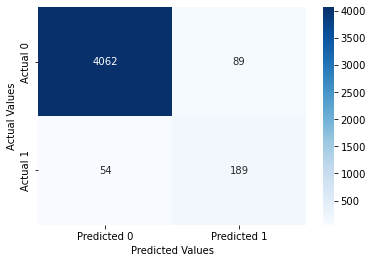

In [21]:
confusion_matrix_data(train_data,train_data.AS,logit_model_including_all,0.3)

Test

Classification accuracy = 95.0%
Precision = 49.4%
TPR or Recall = 84.0%
FNR = 16.0%
FPR = 4.5%
ROC-AUC = 97.4%


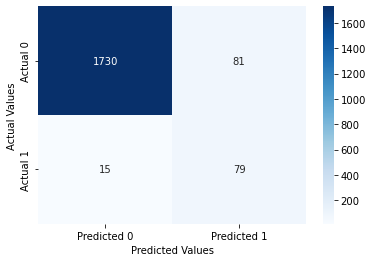

In [22]:
confusion_matrix_data(test_data,test_data.AS,logit_model_including_all,0.3)

Model Improvement (Variable Selection Methods to increase interpretability) 

In [23]:
predictors

,Age,Pos,Tm,G,GS,MP,FG,FGA,FGP,three_P,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,24,C,22,22,0,7.4,0.8,1.9,0.405,0.2,...,0.450,0.4,1.3,1.6,0.2,0.0,0.6,0.5,1.0,2.2
2,23,PG,56,56,2,15.4,2.6,6.3,0.410,1.1,...,0.800,0.2,1.4,1.6,1.9,0.6,0.1,1.1,0.9,7.3
3,24,PG,50,50,0,15.9,2.3,6.4,0.356,0.8,...,0.667,0.3,1.1,1.4,2.2,0.6,0.0,1.1,1.2,6.5
4,25,PG,44,44,1,12.9,1.3,4.0,0.339,0.6,...,0.800,0.3,1.1,1.4,2.0,0.5,0.0,0.7,0.7,3.9
5,26,PG,57,57,22,22.4,2.8,7.2,0.390,1.2,...,0.790,0.4,1.6,2.0,3.6,0.6,0.1,1.1,1.3,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6294,35,C,72,72,51,15.9,2.3,4.4,0.508,0.0,...,0.783,1.5,2.5,4.0,0.4,0.3,0.8,0.7,2.6,5.0
6295,23,SG,68,68,6,15.5,2.0,5.0,0.393,1.4,...,0.898,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0
6296,24,SG,75,75,8,15.1,1.5,3.9,0.395,1.1,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
6297,25,SG,31,31,2,19.0,1.8,5.1,0.357,1.3,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3


In [24]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_predictors = predictors.select_dtypes(include=numerics)
numeric_predictors

,Age,Tm,G,GS,MP,FG,FGA,FGP,three_P,three_PA,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,24,22,22,0,7.4,0.8,1.9,0.405,0.2,0.5,...,0.450,0.4,1.3,1.6,0.2,0.0,0.6,0.5,1.0,2.2
2,23,56,56,2,15.4,2.6,6.3,0.410,1.1,3.1,...,0.800,0.2,1.4,1.6,1.9,0.6,0.1,1.1,0.9,7.3
3,24,50,50,0,15.9,2.3,6.4,0.356,0.8,3.0,...,0.667,0.3,1.1,1.4,2.2,0.6,0.0,1.1,1.2,6.5
4,25,44,44,1,12.9,1.3,4.0,0.339,0.6,2.0,...,0.800,0.3,1.1,1.4,2.0,0.5,0.0,0.7,0.7,3.9
5,26,57,57,22,22.4,2.8,7.2,0.390,1.2,3.5,...,0.790,0.4,1.6,2.0,3.6,0.6,0.1,1.1,1.3,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6294,35,72,72,51,15.9,2.3,4.4,0.508,0.0,0.0,...,0.783,1.5,2.5,4.0,0.4,0.3,0.8,0.7,2.6,5.0
6295,23,68,68,6,15.5,2.0,5.0,0.393,1.4,3.6,...,0.898,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0
6296,24,75,75,8,15.1,1.5,3.9,0.395,1.1,2.9,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
6297,25,31,31,2,19.0,1.8,5.1,0.357,1.3,4.1,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3


In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

numeric_predictors = add_constant(numeric_predictors)
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_predictors.columns

for i in range(len(numeric_predictors.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(numeric_predictors.values, i)

sorted_vif = vif_data.sort_values(by="VIF", ascending=False)
sorted_vif[sorted_vif["VIF"] > 10]

,feature,VIF
7,FGA,8956.975012
27,PTS,6768.759784
13,two_PA,6277.122466
6,FG,4837.105547
21,TRB,2521.515586
12,two_P,1945.006501
10,three_PA,1560.415228
20,DRB,1342.452201
9,three_P,444.681686
16,FT,434.184028


Small VIF values, VIF < 3, indicate low correlation among variables under ideal conditions. The default VIF cutoff value is 5; only variables with a VIF less than 5 will be included in the model. However, note that many sources say that a VIF of less than 10 is acceptable.

FGA, PTS, 2PA, FG, TRB, 2P, 3PA, DRB all have VIF values greater than 1000 meaning that these variables are perfectly correlated with each other (perfect multicollinearity). We shouldn't have all of these variables included in the model at the same time. Having them all included in the model won't increase accuracy by much and in fact decrease interpretability and lead to incorrect inferences of the model.

Using Forward Selection

In [27]:
X = predictors.drop(["Pos"], axis=1)
X

,Age,Tm,G,GS,MP,FG,FGA,FGP,three_P,three_PA,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,24,22,22,0,7.4,0.8,1.9,0.405,0.2,0.5,...,0.450,0.4,1.3,1.6,0.2,0.0,0.6,0.5,1.0,2.2
2,23,56,56,2,15.4,2.6,6.3,0.410,1.1,3.1,...,0.800,0.2,1.4,1.6,1.9,0.6,0.1,1.1,0.9,7.3
3,24,50,50,0,15.9,2.3,6.4,0.356,0.8,3.0,...,0.667,0.3,1.1,1.4,2.2,0.6,0.0,1.1,1.2,6.5
4,25,44,44,1,12.9,1.3,4.0,0.339,0.6,2.0,...,0.800,0.3,1.1,1.4,2.0,0.5,0.0,0.7,0.7,3.9
5,26,57,57,22,22.4,2.8,7.2,0.390,1.2,3.5,...,0.790,0.4,1.6,2.0,3.6,0.6,0.1,1.1,1.3,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6294,35,72,72,51,15.9,2.3,4.4,0.508,0.0,0.0,...,0.783,1.5,2.5,4.0,0.4,0.3,0.8,0.7,2.6,5.0
6295,23,68,68,6,15.5,2.0,5.0,0.393,1.4,3.6,...,0.898,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0
6296,24,75,75,8,15.1,1.5,3.9,0.395,1.1,2.9,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
6297,25,31,31,2,19.0,1.8,5.1,0.357,1.3,4.1,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3


In [31]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.ols('AS~' + '+'.join(predictor_subset),data = train_data).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

In [32]:
#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

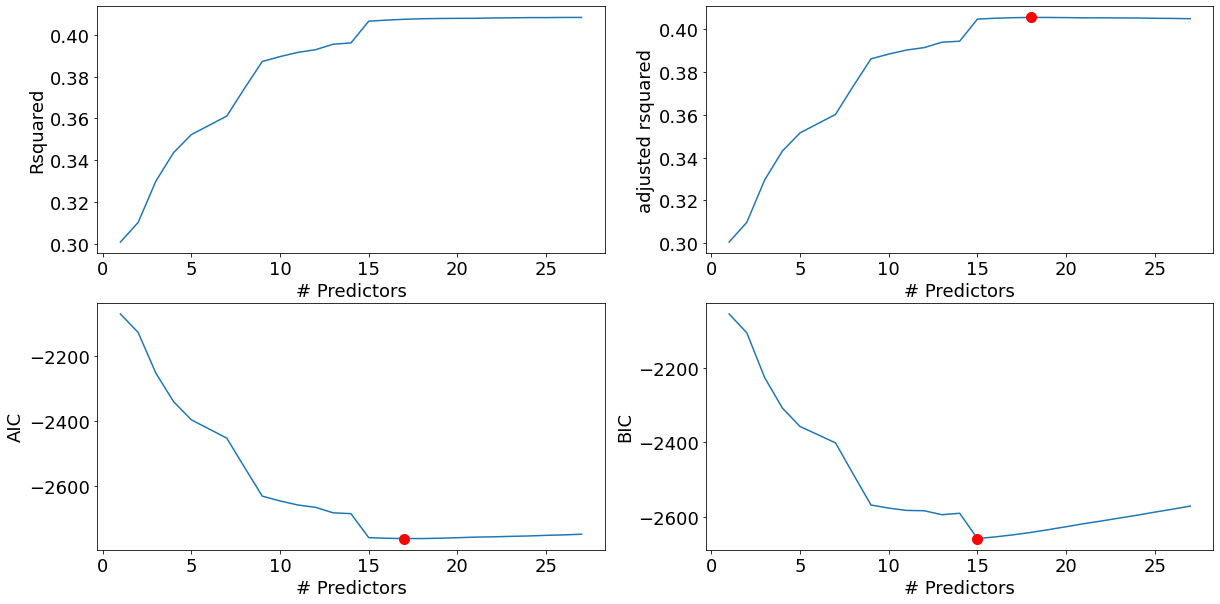

In [39]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

In [35]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [36]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [37]:
models_best = forward_selection()

Processed  27 models on 1 predictors in 0.1268308162689209 seconds.
Processed  26 models on 2 predictors in 0.11806893348693848 seconds.
Processed  25 models on 3 predictors in 0.14501619338989258 seconds.
Processed  24 models on 4 predictors in 0.148972749710083 seconds.
Processed  23 models on 5 predictors in 0.16838908195495605 seconds.
Processed  22 models on 6 predictors in 0.18697381019592285 seconds.
Processed  21 models on 7 predictors in 0.220794677734375 seconds.
Processed  20 models on 8 predictors in 0.21936392784118652 seconds.
Processed  19 models on 9 predictors in 0.23417925834655762 seconds.
Processed  18 models on 10 predictors in 0.2459249496459961 seconds.
Processed  17 models on 11 predictors in 0.24792075157165527 seconds.
Processed  16 models on 12 predictors in 0.26065778732299805 seconds.
Processed  15 models on 13 predictors in 0.24628400802612305 seconds.
Processed  14 models on 14 predictors in 0.25365591049194336 seconds.
Processed  13 models on 15 predicto

the lower the AIC/BIC value, the better fitting model

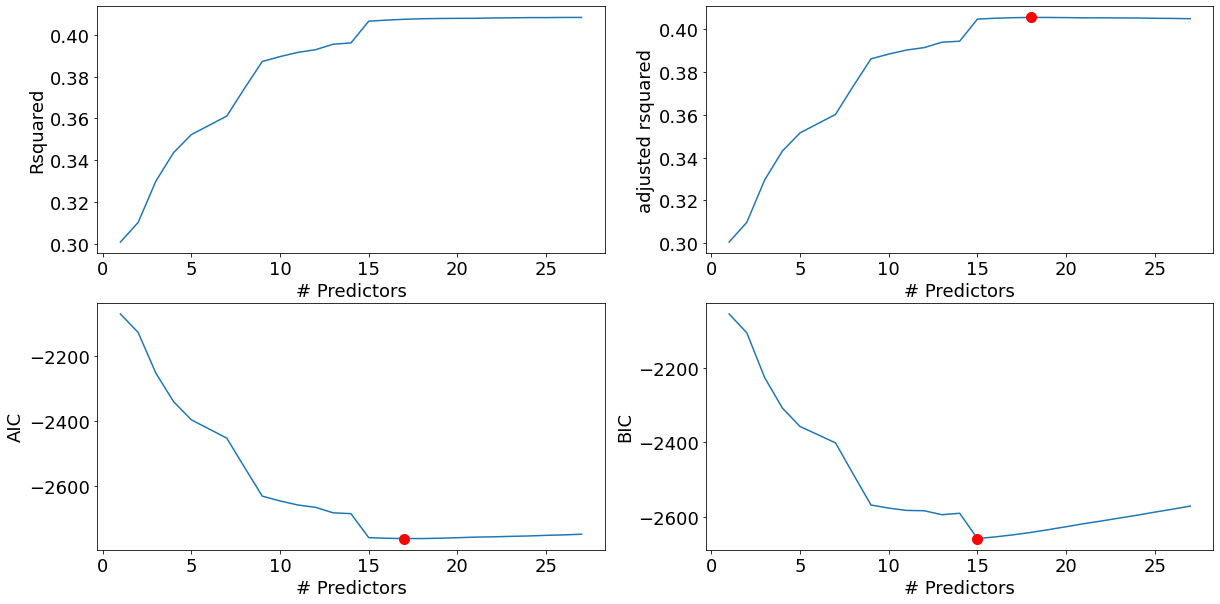

In [40]:
best_sub_plots()

The model with 16 predictors is the best model based on the AIC criterion, and very close to the best model based on the BIC and adjusted R-squared criteria. Let us select the model with 16 predictors.

In [41]:
best_fwd_reg_model = models_best['model'][16]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AS   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     187.8
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:10:05   Log-Likelihood:                 1398.7
No. Observations:                4394   AIC:                            -2763.
Df Residuals:                    4377   BIC:                            -2655.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3377      0.034      9.984      0.000       0.271       0.404
FT             0.0305      0.010      3.021      0.003       0.011       0.050
PF            -0.0445      0.006     -7.394      0.000      -0.056      -0.033
DRB            0.0193      0.003      6.611      0.000       0.014       0.025
AST            0.0339      0.003     11.350      0.000       0.028       0.040
MP            -0.0054      0.001    -10.718      0.000      -0.006      -0.004
BLK            0.0476      0.010      4.923      0.000       0.029       0.067
PTS            0.0448      0.009      4.787      0.000       0.026       0.063
FGA           -0.0682      0.006    -11.806      0.000      -0.080      -0.057
eFGP           0.1145      0.139      0.822      0.411      -0.159       0.388
FTP           -0.1123      0.024     -4.698      0.000      -0.159      -0.065
TOV           -0.0399      0.009     -4.297      0.000      -0.058      -0.022
FGP           -0.7598      0.145     -5.252      0.000      -1.043      -0.476
FG             0.0748      0.020      3.828      0.000       0.036       0.113
Tm            -0.0038      0.000     -9.142      0.000      -0.005      -0.003
G              0.0035      0.000      8.978      0.000       0.003       0.004
STL            0.0197      0.010      1.980      0.048       0.000       0.039
==============================================================================
Omnibus:                     1837.431   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12326.603
Skew:                           1.860   Prob(JB):                         0.00
Kurtosis:                      10.314   Cond. No.                     7.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Classification accuracy = 92.6%
Precision = 59.5%
TPR or Recall = 76.4%
FNR = 23.6%
FPR = 5.7%
ROC-AUC = 97.4%


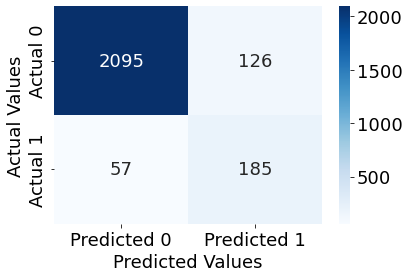

In [42]:
confusion_matrix_data(train_data,train_data.AS,best_fwd_reg_model,0.3)

Classification accuracy = 90.6%
Precision = 43.2%
TPR or Recall = 88.2%
FNR = 11.8%
FPR = 9.2%
ROC-AUC = 97.3%


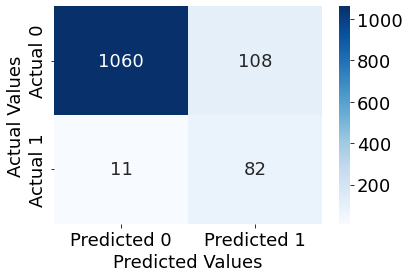

In [43]:
confusion_matrix_data(test_data,test_data.AS,best_fwd_reg_model,0.3)

Ridge Regression

In [62]:
#from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
#from sklearn.preprocessing import StandardScaler 
#from sklearn.metrics import r2_score

In [61]:
#X.columns

In [63]:
#y_train_ridge = train_data.AS

#Standardizing predictors so that each of them have zero mean and unit variance

#Filtering all predictors

#X_train_ridge = X

#Defining a scaler object
#scaler = StandardScaler()

#The scaler object will contain the mean and variance of each column (predictor) of X. 
#These values will be useful to scale test data based on the same mean and variance as obtained on train data
#scaler.fit(X_train_ridge)

#Using the scaler object (or the values of mean and variance stored in it) to standardize X (or train data)
#Xstd_train_ridge = scaler.transform(X_train_ridge)

In [64]:
#X_test = test_data.drop(["Pos", "Player", "Season", "AS"], axis=1)
#X_test.head()

In [65]:
#scaler.fit(X_test)
#Xstd_test_ridge = scaler.transform(X_test)

In [66]:
#scaler.fit(y_train_ridge)
#ystd_train_ridge = scaler.transform(y_train_ridge)

In [67]:
#The tuning parameter lambda is referred as alpha in sklearn

#Creating a range of values of the tuning parameter to visualize the ridge regression coefficients
#for different values of the tuning parameter

#alphas = 10**np.linspace(2,0.5,200)*0.5
#ridgecv = RidgeCV(alphas = alphas,store_cv_values=True)
#ridgecv.fit(Xstd_train_ridge, y_train_ridge)

#Optimal value of the tuning parameter - lambda
#ridgecv.alpha_

In [68]:
#ridge = Ridge(alpha = ridgecv.alpha_)
#ridge.fit(Xstd_train_ridge, y_train_ridge)
#pred_test = ridge.predict(Xstd_test_ridge)

Using Backward Selection

In [69]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [70]:
def backward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"], index = range(1,len(X.columns)))

    tic = time.time()
    predictors = X.columns
    models_best.loc[len(predictors)] = processSubset(predictors)
    
    while(len(predictors) > 1):  
        models_best.loc[len(predictors)-1] = backward(predictors)
        predictors = models_best.loc[len(predictors)-1]["model"].params.index[1:]

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [71]:
models_best = backward_selection()

Processed  27 models on 26 predictors in 0.8193831443786621 seconds.
Processed  26 models on 25 predictors in 0.759645938873291 seconds.
Processed  25 models on 24 predictors in 0.6880569458007812 seconds.
Processed  24 models on 23 predictors in 0.6327848434448242 seconds.
Processed  23 models on 22 predictors in 0.593980073928833 seconds.
Processed  22 models on 21 predictors in 0.5513520240783691 seconds.
Processed  21 models on 20 predictors in 0.5012071132659912 seconds.
Processed  20 models on 19 predictors in 0.4597170352935791 seconds.
Processed  19 models on 18 predictors in 0.42876696586608887 seconds.
Processed  18 models on 17 predictors in 0.3847959041595459 seconds.
Processed  17 models on 16 predictors in 0.34712767601013184 seconds.
Processed  16 models on 15 predictors in 0.3136777877807617 seconds.
Processed  15 models on 14 predictors in 0.26801300048828125 seconds.
Processed  14 models on 13 predictors in 0.23789596557617188 seconds.
Processed  13 models on 12 predi

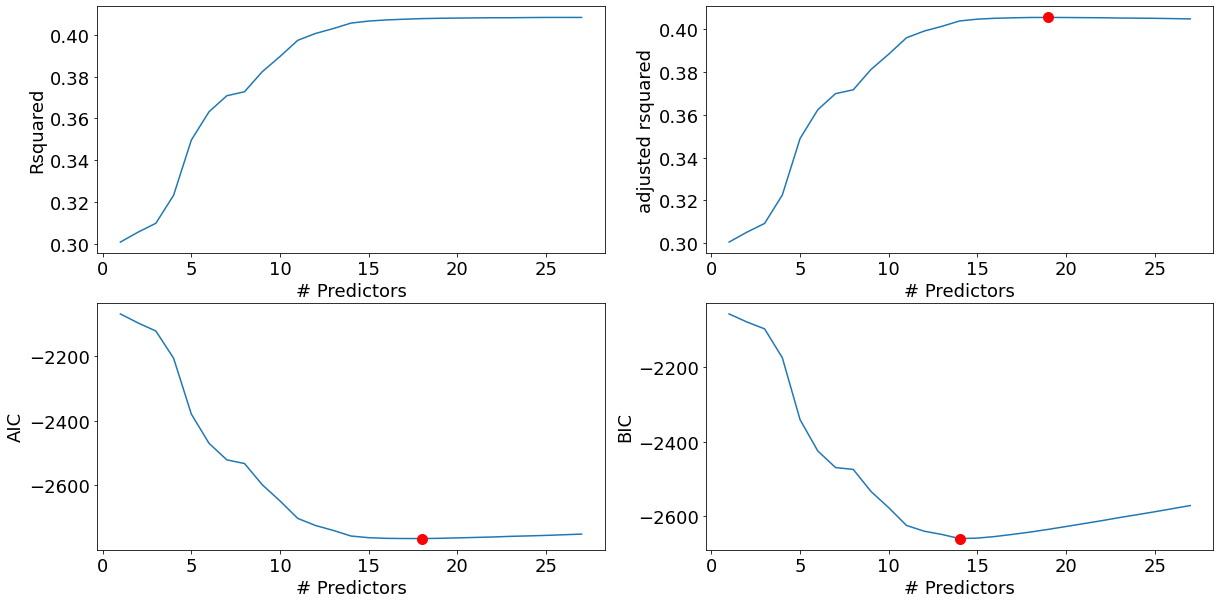

In [72]:
best_sub_plots()

The model with 18 predictors is the best model based on the AIC criterion, and very close to the best model based on the BIC and adjusted R-squared criteria. Let us select the model with 18 predictors.

In [82]:
best_bwd_reg_model = models_best['model'][18]
best_bwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AS   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     167.4
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:48:36   Log-Likelihood:                 1401.3
No. Observations:                4394   AIC:                            -2765.
Df Residuals:                    4375   BIC:                            -2643.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3226      0.036      8.917      0.000       0.252       0.394
Age            0.0009      0.001      1.457      0.145      -0.000       0.002
Tm            -0.0041      0.000     -9.223      0.000      -0.005      -0.003
G              0.0036      0.000      9.163      0.000       0.003       0.004
GS             0.0002      0.000      1.622      0.105   -5.05e-05       0.001
MP            -0.0058      0.001    -10.583      0.000      -0.007      -0.005
FG             0.1591      0.013     12.627      0.000       0.134       0.184
FGP           -0.6371      0.068     -9.350      0.000      -0.771      -0.503
three_P        0.0615      0.023      2.634      0.008       0.016       0.107
three_PA      -0.0709      0.009     -7.688      0.000      -0.089      -0.053
two_PA        -0.0661      0.006    -10.809      0.000      -0.078      -0.054
FT             0.0754      0.004     19.299      0.000       0.068       0.083
FTP           -0.1113      0.024     -4.668      0.000      -0.158      -0.065
DRB            0.0186      0.003      6.281      0.000       0.013       0.024
AST            0.0328      0.003     10.860      0.000       0.027       0.039
STL            0.0202      0.010      2.012      0.044       0.001       0.040
BLK            0.0474      0.010      4.884      0.000       0.028       0.066
TOV           -0.0386      0.009     -4.133      0.000      -0.057      -0.020
PF            -0.0451      0.006     -7.504      0.000      -0.057      -0.033
==============================================================================
Omnibus:                     1814.637   Durbin-Watson:                   1.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11961.977
Skew:                           1.838   Prob(JB):                         0.00
Kurtosis:                      10.198   Cond. No.                     2.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Classification accuracy = 92.5%
Precision = 59.5%
TPR or Recall = 75.7%
FNR = 24.3%
FPR = 5.7%
ROC-AUC = 97.5%


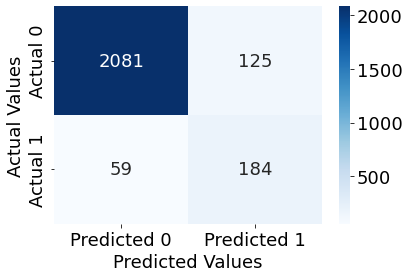

In [83]:
confusion_matrix_data(train_data,train_data.AS,best_bwd_reg_model,0.3)

Classification accuracy = 90.3%
Precision = 43.4%
TPR or Recall = 87.2%
FNR = 12.8%
FPR = 9.5%
ROC-AUC = 97.3%


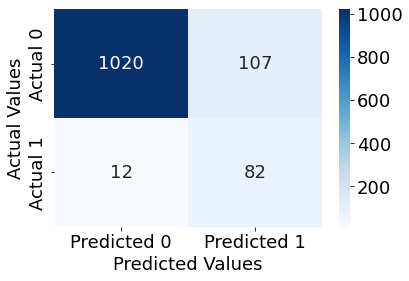

In [84]:
confusion_matrix_data(test_data,test_data.AS,best_bwd_reg_model,0.3)

In [87]:
sorted_vif[sorted_vif["VIF"] > 10]

,feature,VIF
7,FGA,8956.975012
27,PTS,6768.759784
13,two_PA,6277.122466
6,FG,4837.105547
21,TRB,2521.515586
12,two_P,1945.006501
10,three_PA,1560.415228
20,DRB,1342.452201
9,three_P,444.681686
16,FT,434.184028


in case of determining players that make it to the all stars, false negatives are more concerning than false positives. This is because if a person has diabetes, and is told that they do not have diabetes, their condition may deteriorate. If a person does not have diabetes, and is told that they have diabetes, they may take unnecessary precautions or tests, but it will not be as harmful to the person as in the previous case. So, in this problem, we will be more focused on reducing the number of false negatives, instead of reducing the false positives or increasing the overall classification accuracy.

We can decrease the cutoff for classifying a person as having diabetes to reduce the number of false negatives.

Note that the changed cut-off reduced the number of false negatives, but at the cost of increasing the false positives. However, the stakeholders may prefer the reduced cut-off to be safer.